<a href="https://colab.research.google.com/github/vipulgote1999/machine-learning-udacity/blob/master/choose_your_own_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-learn==0.18

     |████████████████████████████████| 11.4MB 2.1MB/s 
ERROR: fancyimpute 0.4.3 has requirement scikit-learn>=0.19.1, but you'll have scikit-learn 0.18 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.18 which is incompatible.
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.18 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [0]:
!pip install numpy==1.11.1

     |████████████████████████████████| 15.3MB 2.5MB/s 
ERROR: cvxpy 1.0.15 has requirement numpy>=1.14, but you'll have numpy 1.11.1 which is incompatible.
ERROR: pyarrow 0.14.0 has requirement numpy>=1.14, but you'll have numpy 1.11.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.18 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement numpy<2.0,>=1.14.5, but you'll have numpy 1.11.1 which is incompatible.
ERROR: autograd 1.2 has requirement numpy>=1.12, but you'll have numpy 1.11.1 which is incompatible.
ERROR: tensorflow-hub 0.5.0 has requirement numpy>=1.12.0, but you'll have numpy 1.11.1 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.11.1 which is incompatible.
ERROR: pandas 0.24.2 has requirement numpy>=1.12.0, but you'll have nu

In [0]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test



In [0]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end
                                    


# **using k nearest neighbors**

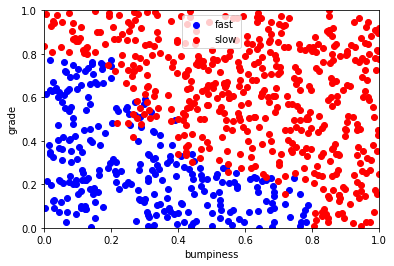

In [0]:
#!/usr/bin/python

import matplotlib.pyplot as plt
#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary








try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(features_train, labels_train)
pred=clf.predict(features_test)



In [0]:
accuracy=accuracy_score(pred,labels_test)
print(accuracy)

0.94


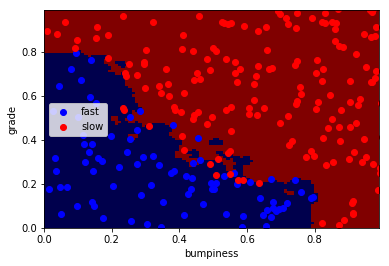

In [0]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

# **using Random forest method**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf1=RandomForestClassifier(n_estimators=100,min_samples_split=0.1,random_state=5,n_jobs=-1)

clf1.fit(features_train,labels_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [0]:
pred2=clf1.predict(features_test)
acc2=accuracy_score(pred2,labels_test)
print(acc2)

0.928


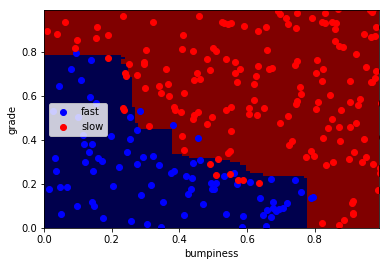

In [0]:
try:
    prettyPicture(clf1, features_test, labels_test)
except NameError:
    pass#######acc at n_estimators=100,min_samples_split=0.1,random_state=5,n_jobs=-1

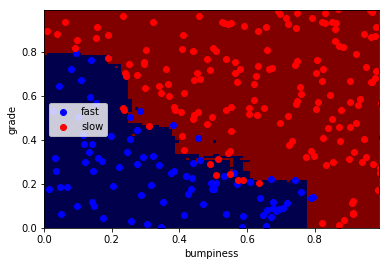

In [0]:
try:
    prettyPicture(clf1, features_test, labels_test)
except NameError:
    pass            ####for max_leaf node=1000,n_estimators=50000 low acc than 0.928

# **ada boost classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

clf2 = AdaBoostClassifier(n_estimators=1000,learning_rate=1)

clf2.fit(features_train,labels_train)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)

In [0]:
pred3=clf2.predict(features_test)
acc3=accuracy_score(pred3,labels_test)
print(acc3)

0.924


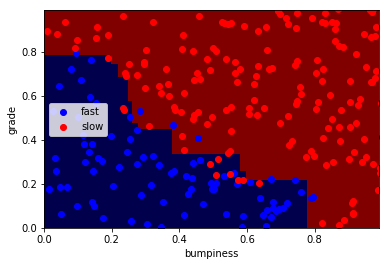

In [0]:
try:
    prettyPicture(clf2, features_test, labels_test)
except NameError:
    pass            ####for max_leaf node=1000,n_estimators=50000 low acc than 0.928